This notebook visualize the results of the methods evaluated with Benchmark

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, sys
import numpy as np

In [2]:
result_dir = 'Benchmark_results/'
all_result_file = os.listdir(result_dir)
all_result_file.sort()

In [3]:
all_res_df = []
methods = []
# load all results into pandas dataframe
for file in all_result_file:
    if file.endswith('result.txt'):
        methods.append(file.replace('_result.txt', ''))
        res_df = pd.read_csv(result_dir+file, sep='\t', header=None, index_col=0)
        all_res_df.append(res_df)

In [4]:
# combine the results
all_result_df = pd.concat(all_res_df, axis=1)
all_result_df.columns = methods
all_result_df

,EGSEA,Enrichr,GSEA,Ora,PET,PIANO,camera,decoupler,enrichment_browser,gage,gsva,ora_egsea,padog,plage,roast,safe,ssgsea,zscore
0,,,,,,,,,,,,,,,,,,
AARS,11,1,3,3,1,1.0,1,1,3,104,104,1,43,118,153,126,35,103
AATF,1,4,6,2,1,4.0,11,2,1,115,51,21,19,61,6,101,13,20
ABCF1,5,16,13,47,6,10.0,2,13,1,128,10,28,24,83,134,119,5,20
ADAR,1,1,1,1,1,1.0,1,1,2,29,17,1,7,12,62,18,1,13
AGO1,15,4,1,1,1,6.0,11,2,11,33,28,24,88,25,1,29,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRCC6,1,1,2,13,1,NaN,3,1,3,24,10,1,17,62,23,22,3,2
XRN2,4,1,20,6,2,NaN,6,3,18,115,22,8,63,90,105,112,23,33
YBX3,3,1,1,1,1,NaN,21,1,49,51,44,1,73,28,19,40,2,28


<AxesSubplot: ylabel='Ground truth pathway rank'>

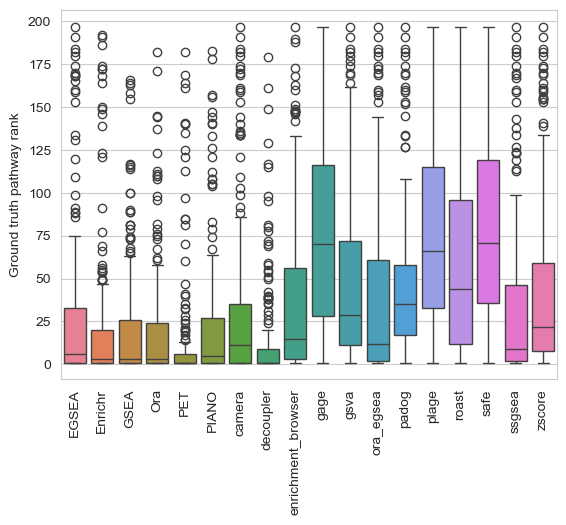

In [5]:
# plot the results
plt.xticks(rotation=90)
plt.ylabel('Ground truth pathway rank')
sns.boxplot(data=all_result_df)

In [6]:
 def apk(predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the average precision at k between two lists of items.
    """
    total_num = len(predicted)
    precision_list = []
    for idx in range(k):
        precision_list.append(np.where(predicted<=idx+1)[0].shape[0]/total_num)
        # print(np.where(predicted<=idx+1)[0].shape[0])
    # return P@10 and AP@10
    return precision_list[-1], np.mean(precision_list)

<AxesSubplot: ylabel='Percent'>

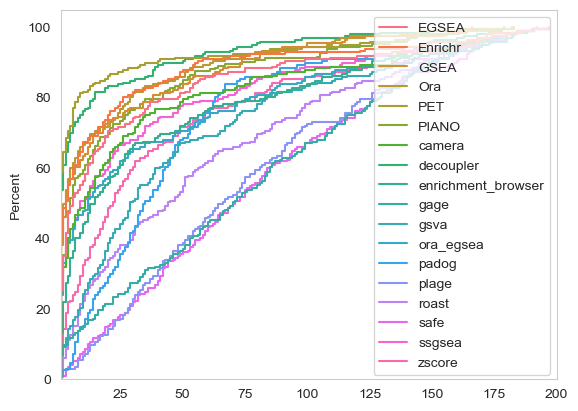

In [7]:
plt.grid(False)
plt.xlim(1, 200)
# plt.ylim(0, 100)
sns.ecdfplot(data=all_result_df, stat='percent')

In [8]:
for method in all_result_df.columns:
    print('-'*20)
    print(method, 'summary:')
    print('Median rank: ', all_result_df[method].median())
    print('Precision@10: ', apk(all_result_df[method])[0])
    print('Average Precision@10: ', apk(all_result_df[method])[1])

--------------------
EGSEA summary:
Median rank:  6.0
Precision@10:  0.5634517766497462
Average Precision@10:  0.46852791878172584
--------------------
Enrichr summary:
Median rank:  3.0
Precision@10:  0.6751269035532995
Average Precision@10:  0.5695431472081218
--------------------
GSEA summary:
Median rank:  3.0
Precision@10:  0.6345177664974619
Average Precision@10:  0.5543147208121827
--------------------
Ora summary:
Median rank:  3.0
Precision@10:  0.6649746192893401
Average Precision@10:  0.5842639593908628
--------------------
PET summary:
Median rank:  1.0
Precision@10:  0.817258883248731
Average Precision@10:  0.7335025380710659
--------------------
PIANO summary:
Median rank:  5.0
Precision@10:  0.5786802030456852
Average Precision@10:  0.4827411167512691
--------------------
camera summary:
Median rank:  11.0
Precision@10:  0.4873096446700508
Average Precision@10:  0.4121827411167513
--------------------
decoupler summary:
Median rank:  1.0
Precision@10:  0.7614213197969543